<a href="https://colab.research.google.com/github/ddlcz/mit-datasci-program/blob/main/FDS_Project_LearnerNotebook_DaraDelaCruz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to display the graphs
%matplotlib inline

In [ ]:
#Mount GDrive to access dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#access dataset from GDrive
path = "/content/drive/MyDrive/Python Course/foodhub_order.csv"
df = pd.read_csv(path)

### Understanding the structure of the data

In [ ]:
#display first 5 lines of data
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
#Use .shape to display tnumber of rows and columsns in dataset
df.shape

(1898, 9)

####Observations:


*   1898 rows
*   9 columns




### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [ ]:
#.dytypes can also be used to identify datatypes
df.dtypes

order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object

#### Observations:

Datatypes include:


*   integers
*   objects (strings)
*   floats




### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# info() used again to display null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


*   There are no missing values in the data



### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# .describe used to view statistical summary
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:


*   Minimum preparation time: 20 min
*   Average preparation time: : 27.3 min
*   Maximum preparation time: 35 min






### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
#use .value_counts() on a particular column to determine the distribution of potential values
df.rating.value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:


*   736 orders where ratings = Not given




### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [ ]:
#OrderID - list unique values of OrderIDs
df['order_id'].nunique()

1898

In [ ]:
#CustomerID - list unique values of OrderIDs
df['customer_id'].nunique()

1200

In [ ]:
#Restaurant Name - list count different restauarnts
df.restaurant_name.value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

In [ ]:
#Restaurant Name - list unique values of restaurants
df['restaurant_name'].nunique()

178

<Axes: xlabel='cost_of_the_order'>

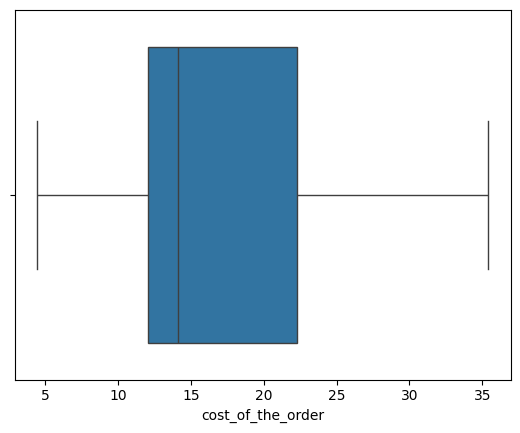

In [ ]:
#Cost - boxplot to display cost of order
sns.boxplot(data=df, x='cost_of_the_order')

<Axes: xlabel='cost_of_the_order', ylabel='Count'>

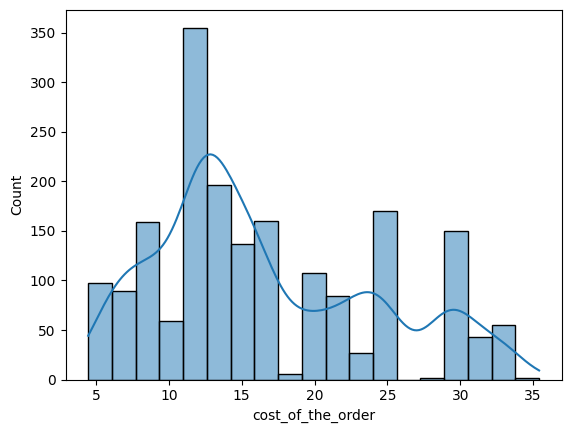

In [ ]:
#Cost - histogram to display distribution of cost of the orders
sns.histplot(data=df, x='cost_of_the_order', kde=True)

In [ ]:
#Day of the Week - list unique values of day of the week
df['day_of_the_week'].nunique()

2

<Axes: xlabel='day_of_the_week', ylabel='count'>

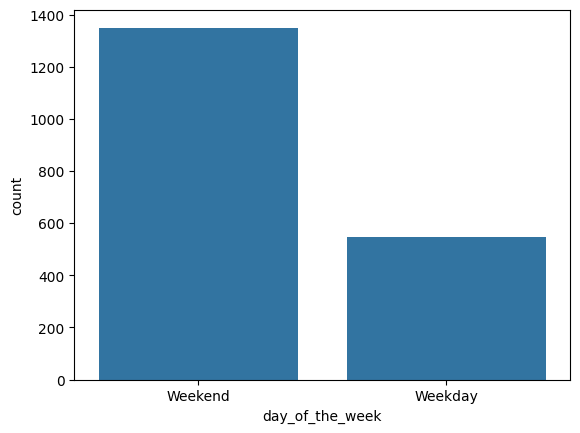

In [ ]:
#Day of the week - countplot for each day
sns.countplot(data=df, x='day_of_the_week')

<Axes: xlabel='rating', ylabel='Count'>

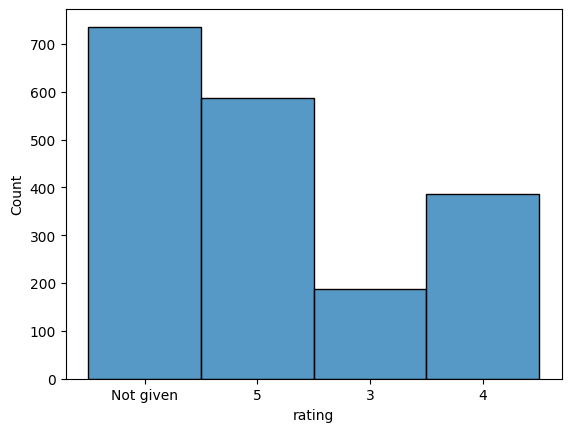

In [ ]:
#Rating - display distribution of "Rating"
sns.histplot(data=df, x='rating')

<Axes: xlabel='rating'>

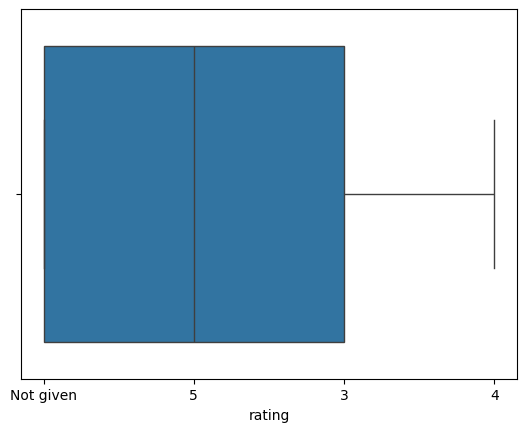

In [ ]:
#Rating - display boxplot distribution of ratings
sns.boxplot(data=df, x='rating')

<Axes: xlabel='food_preparation_time', ylabel='count'>

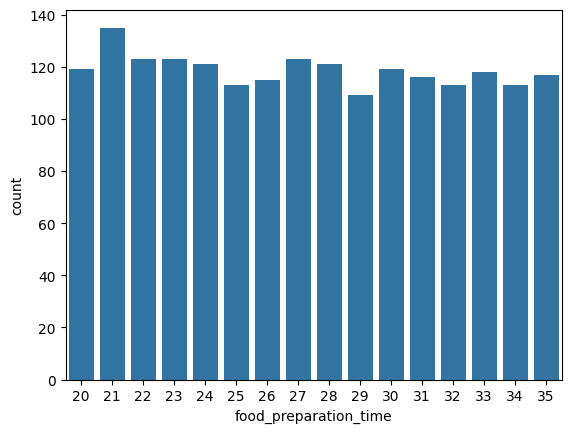

In [ ]:
#Food Preparation Time - display countplot
sns.countplot(data=df, x='food_preparation_time')

<Axes: xlabel='food_preparation_time'>

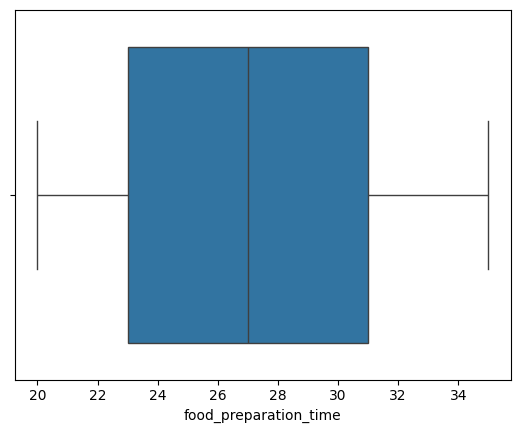

In [ ]:
#Food Preparation time - display boxplot
sns.boxplot(data=df, x='food_preparation_time')

In [ ]:
#Cusine Type - list different types of cuisine
cuis = df.cuisine_type.unique().tolist()
cuis

['Korean',
 'Japanese',
 'Mexican',
 'American',
 'Indian',
 'Italian',
 'Mediterranean',
 'Chinese',
 'Middle Eastern',
 'Thai',
 'Southern',
 'French',
 'Spanish',
 'Vietnamese']

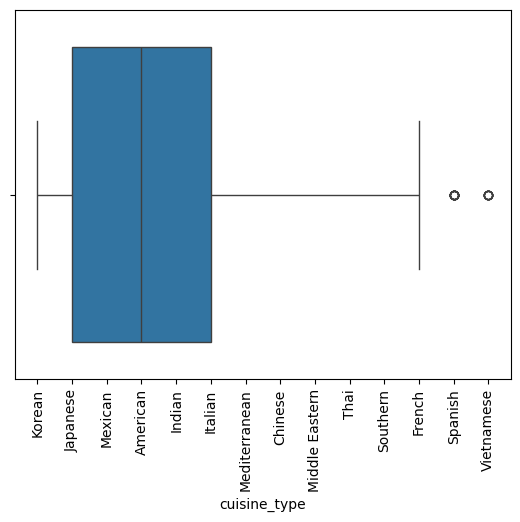

In [ ]:
#Cuisine Type - display boxplot of
sns.boxplot(data = df, x='cuisine_type')
plt.xticks(rotation=90);

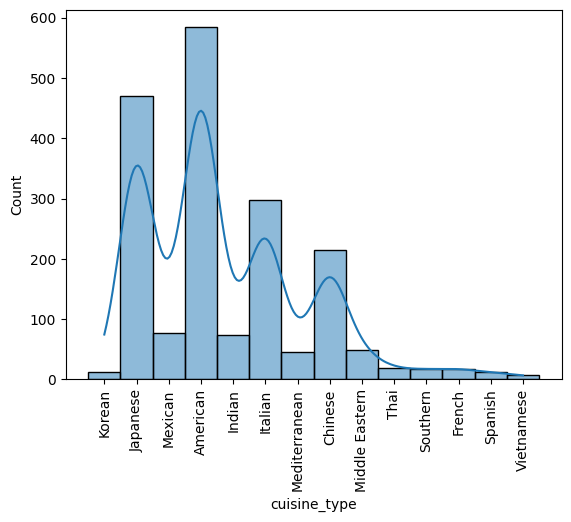

In [ ]:
#Cusine Type - display histograme w/ kernal density estimate
sns.histplot(data = df, x='cuisine_type', binwidth=1000, kde = True)
plt.xticks(rotation=90);

<Axes: xlabel='delivery_time', ylabel='Count'>

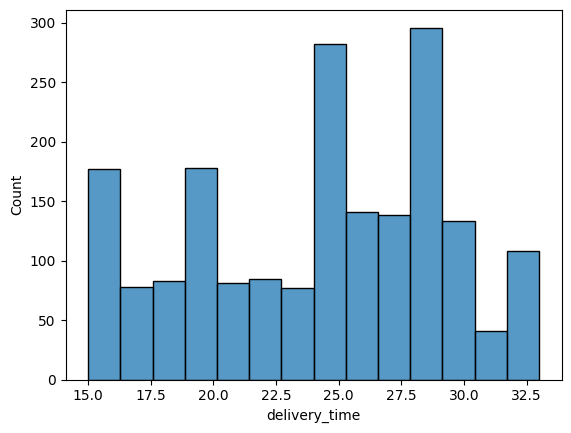

In [ ]:
#Delivery Time - display histogram for delivery time
sns.histplot(data=df, x='delivery_time')

<Axes: xlabel='delivery_time'>

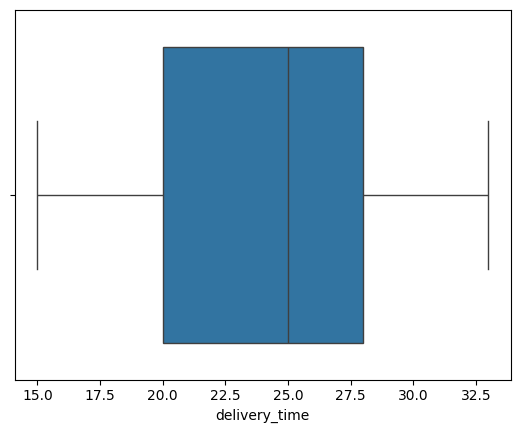

In [ ]:
#Delivery time - display boxplot for delivery time
sns.boxplot(data=df, x='delivery_time')

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
#list value counts of each restaurant
df.restaurant_name.value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

#### Observations:


*   Shake Shack, The meatball shop, Blue ribbon sushi, Blue Ribbon Fried Chicken, and Parm are the top 5 restaurants in terms of # of orders received



### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
#Filter for orders on weekends only
weekend = df[df['day_of_the_week'] == 'Weekend']
weekend

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21
11,1478437,221206,Empanada Mama (closed),Mexican,8.10,Weekend,5,23,22
...,...,...,...,...,...,...,...,...,...
1891,1476981,138586,Shake Shack,American,5.82,Weekend,Not given,22,28
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,Not given,29,21
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19


In [ ]:
#Find count of each cuisine type ordered on the weekends
weekend['cuisine_type'].value_counts(ascending = False)

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations:


*   American cuisine is the most popular on weekends




### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
#list orders where cost of the order is greater than $20:
orders_20 = df[df['cost_of_the_order']>20]
orders_20

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
12,1476966,129969,Blue Ribbon Fried Chicken,American,24.30,Weekend,5,23,17
17,1477373,139885,Blue Ribbon Sushi Izakaya,Japanese,33.03,Weekend,Not given,21,22
...,...,...,...,...,...,...,...,...,...
1884,1477437,304993,Shake Shack,American,31.43,Weekend,3,31,24
1885,1477550,97324,Shake Shack,American,29.05,Weekday,4,27,29
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,Not given,29,21
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17


Observation = there are 555 orders greater than $20

In [ ]:
percentage = (orders_20.shape[0] / df.shape[0])
percentage


0.2924130663856691

#### Observations:

* 29.24% of all orders are over $20

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
#Function to find the mean of total delivery times
df['delivery_time'].mean()

24.161749209694417

#### Observations:


*   Mean Order delivery time is ~24 minutes




### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
#Identify value counts of customer IDs
df['customer_id'].value_counts(ascending = False)

52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: customer_id, Length: 1200, dtype: int64

#### Observations:

Customer IDs of the top 3 most frequent customers:


*  Customer ID: 52832 - 13 orders
*  Customer ID: 47440 - 10 orders
*  Customer ID: 83287 - 9 orders



### Multivariate Analysis

* order_id:
* customer_id:
* restaurant_name:
* cuisine_type:
* cost_of_the_order:
* day_of_the_week:
* rating:
* food_preparation_time: Time (in minutes)
* delivery_time: Time (in minutes)

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [ ]:
#check for correlation among numerical variables in the dataframe
num_var = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
corr = df[num_var].corr()
corr

,cost_of_the_order,food_preparation_time,delivery_time
cost_of_the_order,1.000000,0.041527,-0.029949
food_preparation_time,0.041527,1.000000,0.011094
delivery_time,-0.029949,0.011094,1.000000


<Axes: >

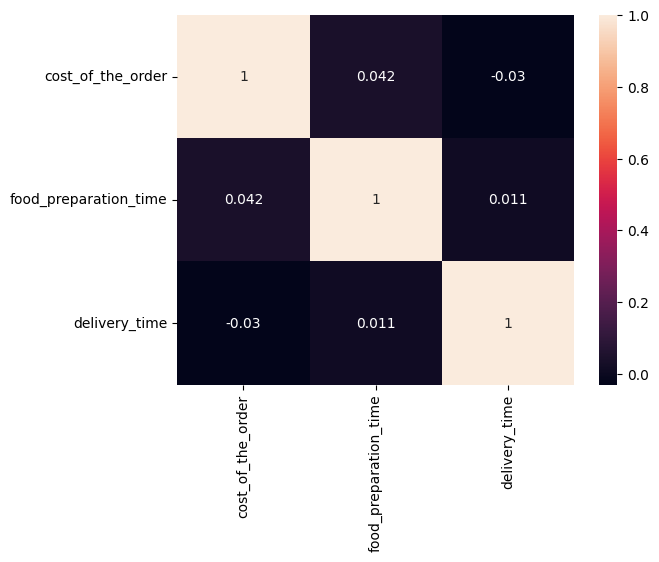

In [ ]:
# Plot the heatmap for numerical variables in the dataframe
sns.heatmap(corr, annot = True,
        xticklabels = corr.columns,
        yticklabels = corr.columns)

<Axes: xlabel='cost_of_the_order', ylabel='day_of_the_week'>

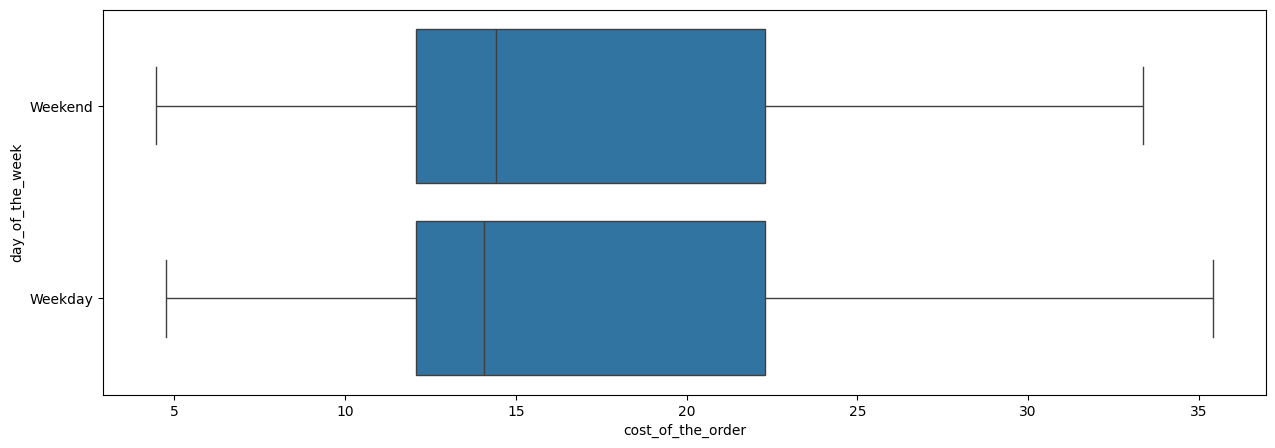

In [ ]:
#Create boxplot to illustrate cost of the order and day of the week
plt.figure(figsize=(15,5))
sns.boxplot(data=df, x='cost_of_the_order', y='day_of_the_week')

<Axes: xlabel='rating', ylabel='delivery_time'>

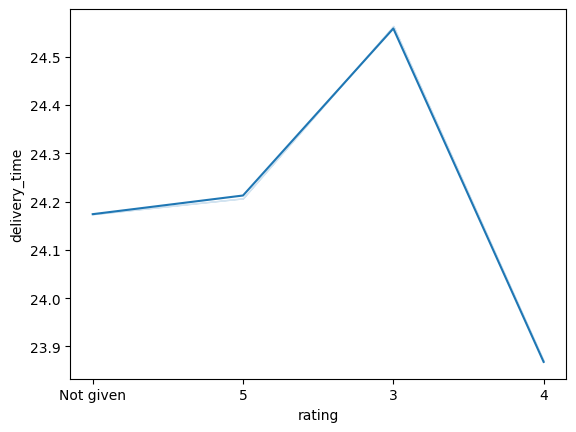

In [ ]:
#Create a lineplot for ratings and the delivery times
sns.lineplot(data=df, x='rating', y='delivery_time', errorbar=('ci',0))

In [ ]:
# importing library to create vissualizations through plotly
import plotly.express as px

In [ ]:
#Create a plotly bar graph to display most popular cuisines (count of orders)
bar = px.bar(df, x='cuisine_type', y='cost_of_the_order')
bar.show()

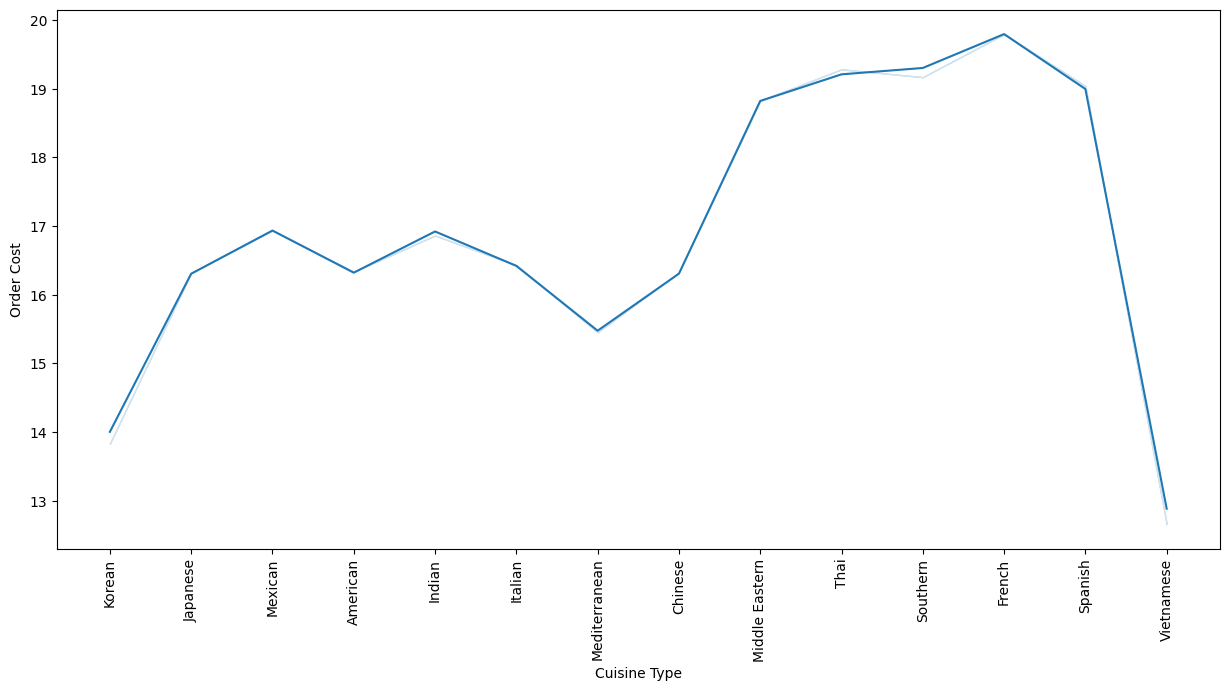

In [ ]:
#Create lineplot displaying cuisine vs. cost of order
plt.figure(figsize=(15,7))
sns.lineplot(data=df, x='cuisine_type', y='cost_of_the_order', errorbar=('ci', False))
plt.ylabel('Order Cost')
plt.xlabel('Cuisine Type')
plt.xticks(rotation=90);

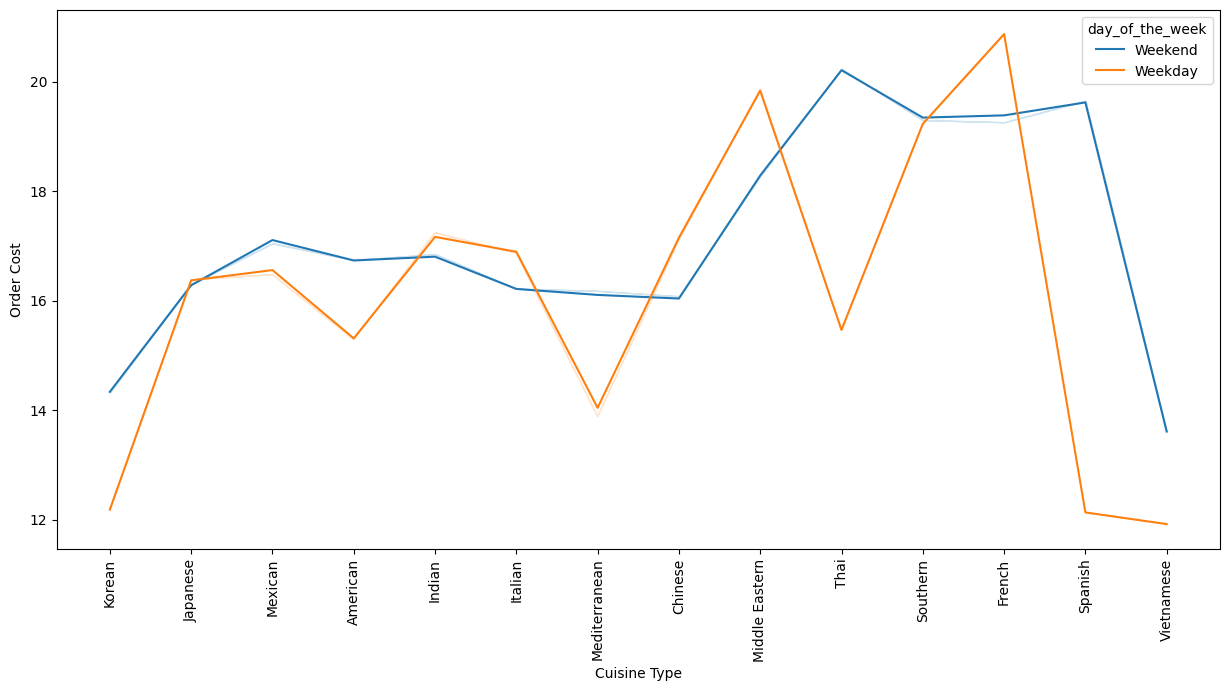

In [ ]:
#Create lineplot displaying cuisine vs. cost of order, separated by day of the week
plt.figure(figsize=(15,7))
sns.lineplot(data=df, x='cuisine_type', y='cost_of_the_order', hue='day_of_the_week', errorbar=('ci', False))
plt.ylabel('Order Cost')
plt.xlabel('Cuisine Type')
plt.xticks(rotation=90);

In [ ]:
#Boxplot displaying cost of the order and rating
fig = px.box(df, x='rating', y='cost_of_the_order', points='all')
fig.show()

<Axes: xlabel='rating', ylabel='cost_of_the_order'>

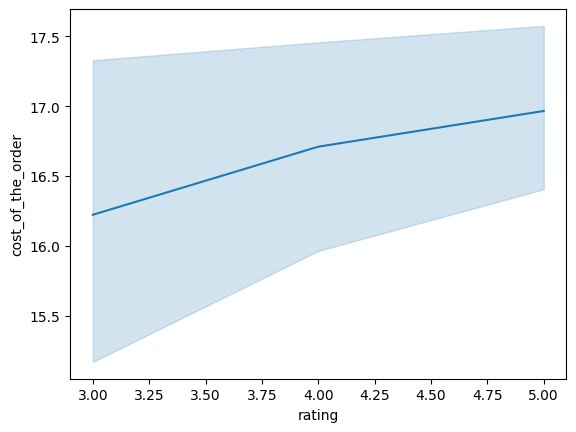

In [ ]:
#Lineplot cost of order vs. rating (dataframe from question 13 used to eliminate 'No Rating' )
sns.lineplot(data=rated_rest, x='rating', y='cost_of_the_order')

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
#Isolate only restaruants with valid ratings
rated_rest = df[df['rating'] != 'Not given'].copy()

# Convert restaurant ratings from string to integer
rated_rest['rating'] = rated_rest['rating'].astype('int')

# Create new dataframe with restaurants that only have ratings as integers
rated_rest_df = rated_rest.groupby(['restaurant_name'])['rating'].count().sort_values().reset_index()
rated_rest_df


,restaurant_name,rating
0,'wichcraft,1
1,Nha Trang One,1
2,Moonstruck on Second,1
3,Mira Sushi,1
4,Lucky Strike,1
...,...,...
151,RedFarm Broadway,41
152,Blue Ribbon Fried Chicken,64
153,Blue Ribbon Sushi,73
154,The Meatball Shop,84


In [ ]:
# Display restaurants with ratings that have a count of 50+ ratings
rest_ratings_50 = rated_rest_df[rated_rest_df['rating'] > 50]['restaurant_name']
rest_ratings_50


152    Blue Ribbon Fried Chicken
153            Blue Ribbon Sushi
154            The Meatball Shop
155                  Shake Shack
Name: restaurant_name, dtype: object

In [ ]:
#Filter restaurants in initial dataframe that have more than 50 value count reviews
rest_rating_avg = rated_rest[rated_rest['restaurant_name'].isin(rest_ratings_50)].copy()
rest_rating_avg

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
12,1476966,129969,Blue Ribbon Fried Chicken,American,24.30,Weekend,5,23,17
15,1477414,66222,Shake Shack,American,16.20,Weekend,5,33,25
19,1477354,67487,Blue Ribbon Sushi,Japanese,16.20,Weekend,4,35,26
22,1478287,150599,Shake Shack,American,29.10,Weekday,5,21,30
...,...,...,...,...,...,...,...,...,...
1880,1477466,222734,Shake Shack,American,13.97,Weekend,5,35,27
1884,1477437,304993,Shake Shack,American,31.43,Weekend,3,31,24
1885,1477550,97324,Shake Shack,American,29.05,Weekday,4,27,29
1886,1478277,48282,The Meatball Shop,American,14.50,Weekend,5,34,25


In [ ]:
#Group restaurants with 50+ rating value counts by their respective average ratings
rest_rating_avg.groupby(['restaurant_name'])['rating'].mean().sort_values()


restaurant_name
Blue Ribbon Sushi            4.219178
Shake Shack                  4.278195
Blue Ribbon Fried Chicken    4.328125
The Meatball Shop            4.511905
Name: rating, dtype: float64

#### Observations:

The following restaurants all have more than 50 reviews and an average rating of at least 4

*   Blue Ribbon Sushi
*   Shake Shack
*   Blue Ribbon Fried Chicken
*   The Meatball Shop






### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
#Function to apply restaurant charges for cost of orders of various amounts
def rest_charges(x):
  if x > 20:
    return x*0.25
  elif x > 5:
    return x*0.15
  else:
    return x*0

In [ ]:
#apply the function to the cost of the orders within the dataframe
df['cost_of_the_order'].apply(rest_charges)

0       7.6875
1       1.8120
2       1.8345
3       7.3000
4       1.7385
         ...  
1893    5.5775
1894    1.8270
1895    6.3050
1896    1.8270
1897    2.9175
Name: cost_of_the_order, Length: 1898, dtype: float64

In [ ]:
#Add column to the dataframe displaying the additional restaurant charges
df['rest_charge_revenue'] = df['cost_of_the_order'].apply(rest_charges)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,rest_charge_revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [ ]:
#Find the sum of all the restaurant charges
df['rest_charge_revenue'].sum()

6166.303

#### Observations:


*   Total Revenue across all restaruant charges = $6166.30



### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
#Add column displaying total time of preparation and delivery
df['total_time'] = df['cost_of_the_order'] + df['food_preparation_time']
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,rest_charge_revenue,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875,55.75
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120,37.08
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345,35.23
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000,54.20
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385,36.59


In [ ]:
#rest_ratings_50 = rated_rest_df[rated_rest_df['rating'] > 50]['restaurant_name']
total_time_60 = df[df['total_time'] > 60]['restaurant_name']
total_time_60

31                              Klong
61      Blue Ribbon Sushi Bar & Grill
73                        Sushi Samba
135                 The Meatball Shop
143                     Sushi of Gari
                    ...              
1821      Grand Sichuan International
1831                   Nobu Next Door
1863                 Sushi of Gari 46
1868                 RedFarm Broadway
1884                      Shake Shack
Name: restaurant_name, Length: 97, dtype: object

In [ ]:
#calculate percentage of orders with total time > 60
percentage = (total_time_60.shape[0] / df.shape[0])
percentage

0.051106427818756586

#### Observations:

*   5.11% of orders have a total preparation & delivery time of over 60 minutes



### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
#Identify the mean delivery time on weekends
weekend = df[df['day_of_the_week'] == 'Weekend']
weekend['delivery_time'].mean()

22.4700222057735

In [ ]:
#Identify mean delivery time on weekdays
weekday = df[df['day_of_the_week'] == 'Weekday']
weekday['delivery_time'].mean()

28.340036563071298

#### Observations:


*   The mean delivery time in minutes is 22 minutes during the weekends, and 28 minutes during weekdays

*   Average delivery time is shorter during weekends




### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  38% of orders were not rated
*  Median cost of orders is higher during the weekend vs. the weekdays
*   Average cost of orders was ~$16
* For orders that were rated, cost of the order and ratings were positively correlated
*   American cuisine was the most ordered, followed by Japanese, Italian & Chinese
*   Delivery times were quicker during the weekends
* Restaurants with 50+ ratings had average ratings of 4+





### Recommendations:

*  Prompt users for more ratings through a loyalty program, and limited time discounts to generate more volume of customer feedback & ratings.

* Work with restaurants to promote or expand menu items around the average of $16 to encourage continued business through FoodHub. Then include options to "upgrade" their orders via drinks, desserts, add-ons.

* With American, Japanese, and Italian cuisine being the most popular, incentivize new restaurants of these cuisines to partner with FoodHub by waiving restaurant charges (15-25%) for the initial months of partnership.

* Send app notifications during the end of the week to encourage ordering during the weekend where median cost of orders were higher and delivery times were quicker.

* Hire more drivers, or incentivize deliveries during the week when delivery times are slower. This could increase orders from users.

---